In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
print('Finsihed loading libraries')

Finsihed loading libraries


In [2]:
filename='data.csv'
data=pd.read_csv(filename,index_col=0)
data.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [3]:
print(data.shape)
#print(data.describe())
feature_names=data.columns
feature_names

(801, 20531)


Index(['gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6',
       'gene_7', 'gene_8', 'gene_9',
       ...
       'gene_20521', 'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525',
       'gene_20526', 'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530'],
      dtype='object', length=20531)

In [4]:
labels=pd.read_csv('labels.csv',index_col=0)
labels.head()

,Class
sample_0,PRAD
sample_1,LUAD
sample_2,PRAD
sample_3,PRAD
sample_4,BRCA


<AxesSubplot:xlabel='gene_1'>

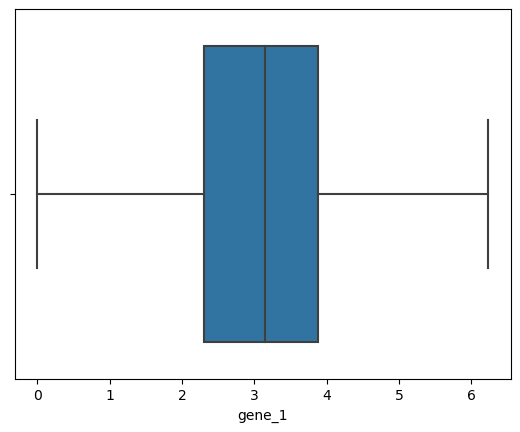

In [5]:
labels.shape
sns.boxplot(data=data,x='gene_1')

In [6]:
obj_coulmns=[x for x in data.columns if data[x].dtypes=='O']
num_columns=[x for x in data.columns if data[x].dtypes!='O']
obj_coulmns

[]

In [7]:
labels.value_counts(normalize=True)

Class
BRCA     0.374532
KIRC     0.182272
LUAD     0.176030
PRAD     0.169788
COAD     0.097378
dtype: float64

(array([136.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 141.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 300.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 146.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  78.]),
 array([0.  , 0.08, 0.16, 0.24, 0.32, 0.4 , 0.48, 0.56, 0.64, 0.72, 0.8 ,
        0.88, 0.96, 1.04, 1.12, 1.2 , 1.28, 1.36, 1.44, 1.52, 1.6 , 1.68,
        1.76, 1.84, 1.92, 2.  , 2.08, 2.16, 2.24, 2.32, 2.4 , 2.48, 2.56,
        2.64, 2.72, 2.8 , 2.88, 2.96, 3.04, 3.12, 3.2 , 3.28, 3.36, 3.44,
        3.52, 3.6 , 3.68, 3.76, 3.84, 3.92, 4.  ]),
 <BarContainer object of 50 artists>)

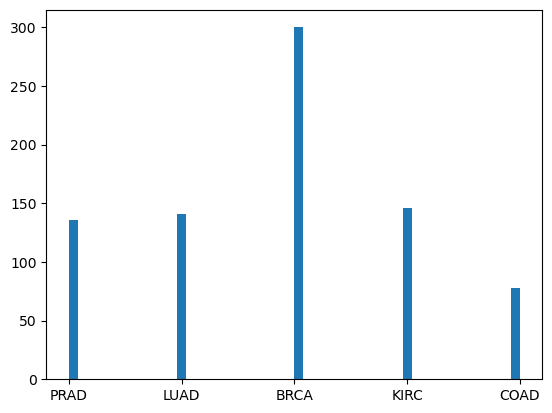

In [8]:
plt.hist(labels,bins=50)

# K-means

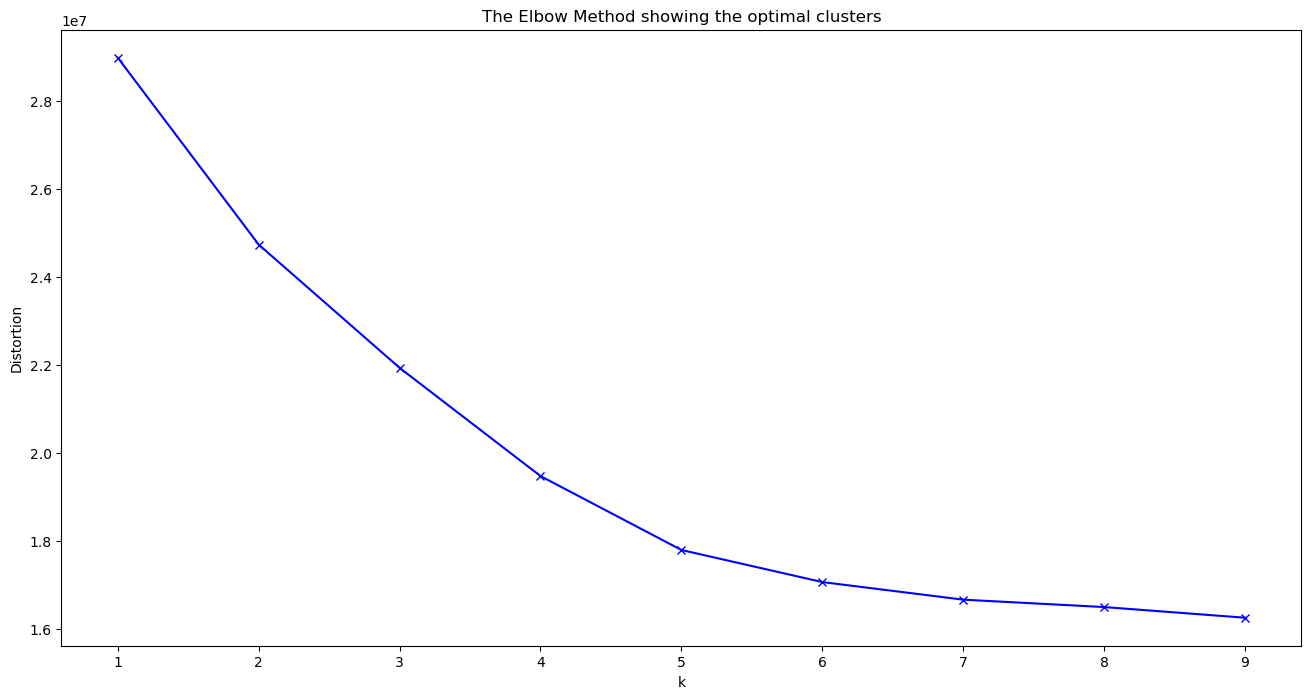

In [9]:
#find the best number of clusters
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel.fit(data)
    distortions.append(kmeansModel.inertia_)
# Plotting the distortions
plt.figure(figsize=(16,8))
plt.plot(K, distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing the optimal clusters")
plt.show()

In [10]:
#fit the model

numClusters = 5
kmeansModel = KMeans(n_clusters=numClusters, random_state=123)
# Fit into our dataset fit
kmeansModel.fit(data)
kmeansClusters = kmeansModel.predict(data)
kmeansClusters

array([0, 4, 0, 0, 1, 0, 2, 0, 1, 0, 1, 2, 0, 1, 1, 1, 4, 2, 2, 0, 1, 2,
       4, 1, 2, 4, 3, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 4, 1, 1, 2, 0, 0, 2,
       2, 1, 0, 3, 1, 4, 1, 4, 1, 0, 3, 1, 1, 3, 2, 1, 4, 1, 1, 4, 0, 3,
       1, 0, 2, 1, 2, 1, 1, 4, 1, 4, 1, 2, 0, 3, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 1, 0, 0, 1, 1, 1, 0, 3, 1, 0, 1, 1, 2, 1, 2, 4, 2, 4, 3, 4, 4,
       0, 1, 4, 0, 1, 2, 2, 2, 1, 1, 4, 2, 4, 1, 0, 0, 0, 1, 2, 1, 3, 1,
       3, 1, 1, 2, 4, 1, 2, 3, 1, 0, 1, 2, 4, 3, 0, 1, 4, 4, 4, 4, 1, 1,
       4, 1, 1, 0, 0, 4, 0, 4, 2, 1, 0, 4, 3, 2, 4, 1, 2, 4, 1, 4, 1, 1,
       1, 0, 1, 2, 3, 2, 1, 0, 0, 0, 4, 4, 1, 4, 4, 2, 4, 0, 4, 1, 1, 1,
       4, 4, 1, 2, 2, 2, 2, 0, 1, 0, 1, 4, 4, 1, 0, 1, 0, 1, 1, 1, 4, 1,
       2, 4, 2, 2, 4, 1, 2, 0, 1, 4, 4, 0, 3, 1, 2, 0, 2, 3, 1, 2, 2, 4,
       0, 0, 4, 4, 2, 1, 1, 3, 1, 0, 4, 1, 0, 2, 0, 0, 0, 1, 3, 3, 4, 3,
       3, 0, 4, 1, 1, 2, 2, 1, 3, 0, 2, 0, 1, 1, 2, 1, 1, 1, 1, 4, 4, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 4, 0, 1,

(array([136.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 302.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 145.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  76.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 142.]),
 array([0.  , 0.08, 0.16, 0.24, 0.32, 0.4 , 0.48, 0.56, 0.64, 0.72, 0.8 ,
        0.88, 0.96, 1.04, 1.12, 1.2 , 1.28, 1.36, 1.44, 1.52, 1.6 , 1.68,
        1.76, 1.84, 1.92, 2.  , 2.08, 2.16, 2.24, 2.32, 2.4 , 2.48, 2.56,
        2.64, 2.72, 2.8 , 2.88, 2.96, 3.04, 3.12, 3.2 , 3.28, 3.36, 3.44,
        3.52, 3.6 , 3.68, 3.76, 3.84, 3.92, 4.  ]),
 <BarContainer object of 50 artists>)

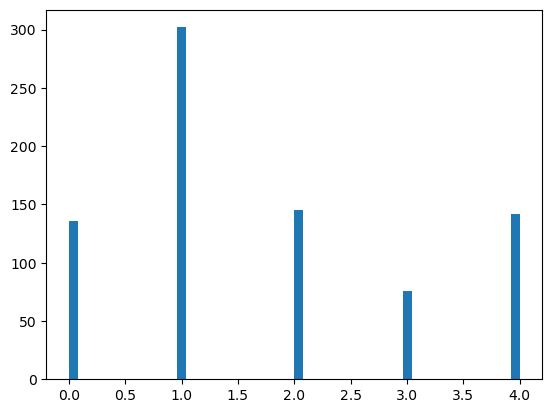

In [11]:
data['clusters']=kmeansClusters

plt.hist(data['clusters'],bins=50)

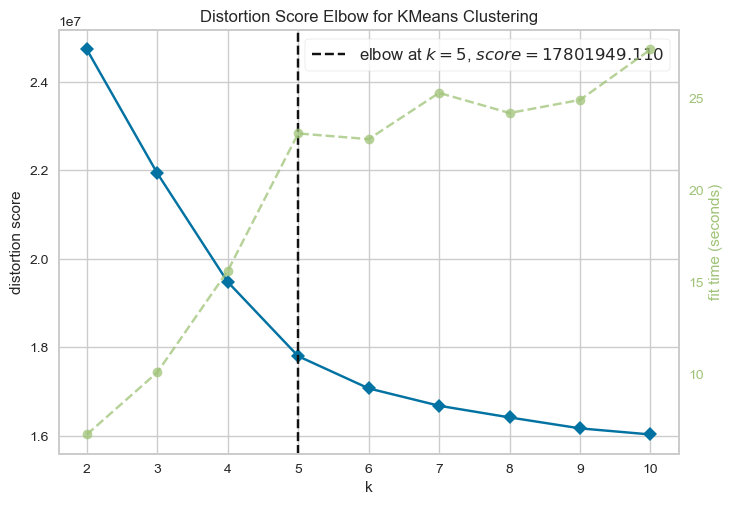

In [13]:
from yellowbrick.cluster import SilhouetteVisualizer,KElbowVisualizer
visualizer1 = KElbowVisualizer(kmeansModel,colors='yellowbrick',feature_names=feature_names)

visualizer1.fit(data)        # Fit the data to the visualizer
visualizer1.show()        # Finalize and render the figure
plt.show()

In [12]:
data['clusters'].value_counts()

1    302
2    145
4    142
0    136
3     76
Name: clusters, dtype: int64

In [13]:
labels['Class'].value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

<AxesSubplot:xlabel='clusters', ylabel='gene_1'>

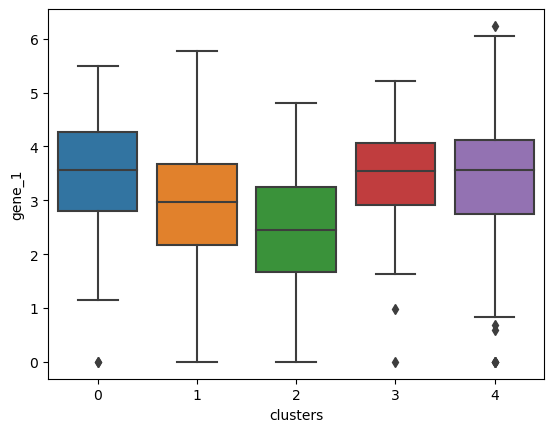

In [14]:
sns.boxplot(data=data, x=data['clusters'],y='gene_1')
#plt.show()


In [15]:
# Accuracy with labels
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(labels['Class'], data['clusters'])
ari*100

98.13802804214912

# DBSCAN

In [16]:
data.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,clusters
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,4
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,1


In [18]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled=scaler.fit_transform(data)
clustering = DBSCAN(eps=10, min_samples=5).fit(data_scaled)
#if an assigned label is -1 then it is considered an outlier
labels2 = clustering.labels_
#(labels2==-1).sum()
labels2

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

# PCA

In [43]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=9, random_state=123) 
#fit
pca.fit(data_scaled)

pcaFitted = pca.transform(data_scaled)
print(pcaFitted.shape)

print(pca.explained_variance_ratio_)

(801, 9)
[0.12692284 0.09413336 0.08573851 0.05586797 0.04774031 0.02782829
 0.02403916 0.02258058 0.01456611]


In [44]:
dd = pd.DataFrame(data = pcaFitted,
                 columns = ["Component 1", 
                            "Component 2",
                           'Component 3',
                           'Component 4',
                           'Component 5','Component 6','Component 7','Component 8','Component 9'])
dd

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9
0,-5.680914,-8.854576,15.864810,-6.658214,3.248218,3.528825,-0.185786,-4.598122,-0.782266
1,-1.452466,10.300712,-1.258536,-1.600556,-5.045056,5.327066,-3.212978,0.636274,-0.084650
2,-10.851417,-1.346610,4.001564,8.015432,3.513435,6.434237,-2.040841,7.847417,-0.216062
3,-9.181030,-8.661253,5.493087,5.500989,-0.470061,4.091632,-2.703024,2.287736,-0.061800
4,-6.277834,-3.110166,-7.334921,0.436084,4.281871,-0.321100,-0.317317,-1.431910,-3.201402
...,...,...,...,...,...,...,...,...,...
796,-5.165835,-4.853121,-7.346404,-1.488916,6.384019,-0.396641,-2.394515,-2.651452,-1.017132
797,-2.660894,4.758428,4.369716,-4.168760,-4.558289,-1.756779,-5.144084,5.006082,-5.556622
798,0.751665,3.570818,2.466663,-3.350013,-7.382629,-6.842233,9.656596,0.514431,3.369135
799,-4.785717,-9.842690,9.279574,0.105471,-1.509515,-0.243106,1.735546,2.268673,0.721173


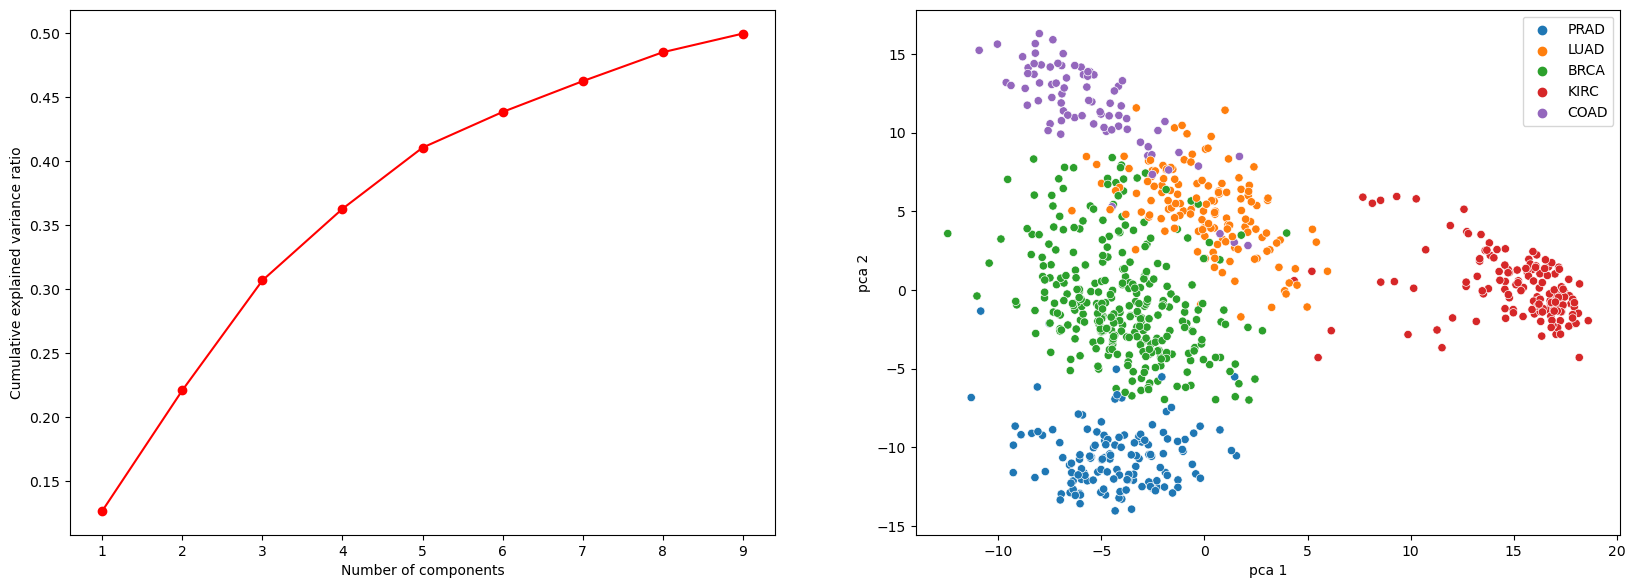

In [51]:
#sns.scatterplot(x=pcaFitted[:,0],y=pcaFitted[:,1],hue=labels['Class'].to_numpy())
fig=plt.figure(figsize=(20,15))
explained_var=np.cumsum(pca.explained_variance_ratio_)
plt.subplot(2,2,1)
plt.plot(range(1,len(explained_var)+1),(explained_var),'ro-',linewidth=1.5) #pca.n_components_+1
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.subplot(2,2,2)
plt.xlabel('pca 1')
plt.ylabel('pca 2')
sns.scatterplot(x=pcaFitted[:,0],y=pcaFitted[:,1],hue=labels['Class'].to_numpy())
plt.show()

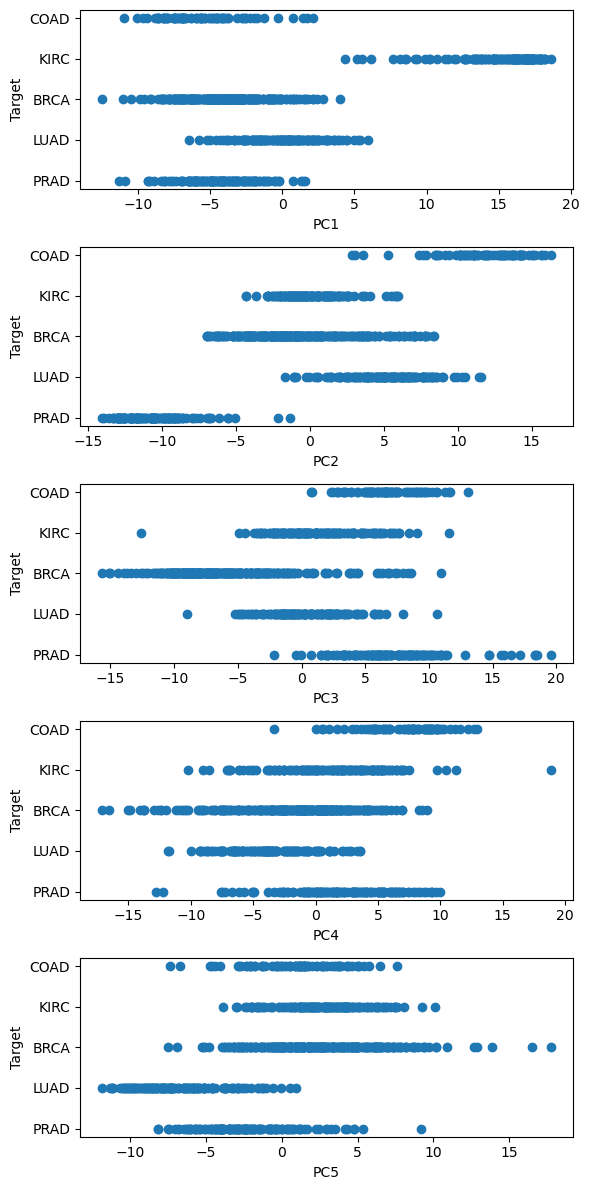

In [49]:
fig, axs = plt.subplots(5, 1, figsize=(6, 12))
for i in range(5):
    axs[i].scatter(pcaFitted[:, i], labels['Class'])
    axs[i].set_xlabel(f"PC{i+1}")
    axs[i].set_ylabel("Target")
plt.tight_layout()
plt.show()

In [52]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40)
tsne_results = tsne.fit_transform(data)
tsne_results

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 801 samples in 0.037s...
[t-SNE] Computed neighbors for 801 samples in 1.567s...
[t-SNE] Computed conditional probabilities for sample 801 / 801
[t-SNE] Mean sigma: 55.800128
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.811348
[t-SNE] KL divergence after 1000 iterations: 0.584192
Wall time: 12 s


array([[ 19.257854 ,  18.571518 ],
       [-21.581861 ,   7.725217 ],
       [ 21.971289 ,  12.825865 ],
       ...,
       [ -4.9871607,  30.975527 ],
       [ 18.28405  ,  16.29002  ],
       [ 14.698121 ,  12.707743 ]], dtype=float32)

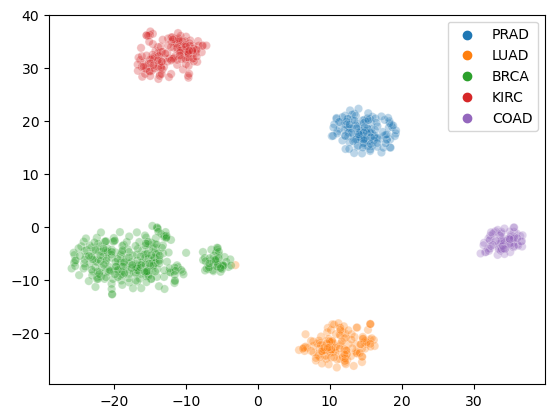

In [53]:
#plot
sns.scatterplot(
    x=tsne_results[:,1], y=tsne_results[:,0],
    legend="full",
    alpha=0.3,
    hue=labels['Class'].to_numpy()
)
plt.show()

In [54]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
clustering = DBSCAN(eps=3.5, min_samples=4).fit(tsne_results)
#if an assigned label is -1 then it is considered an outlier
labels2 = clustering.labels_
#(labels2==-1).sum()
labels2

array([0, 1, 0, 0, 2, 0, 3, 0, 2, 0, 2, 3, 0, 2, 2, 2, 1, 3, 3, 0, 2, 3,
       1, 2, 3, 1, 4, 2, 2, 2, 2, 2, 3, 2, 0, 2, 3, 1, 2, 2, 3, 0, 0, 3,
       3, 2, 0, 4, 2, 1, 2, 1, 2, 0, 4, 2, 2, 4, 3, 2, 1, 3, 2, 1, 0, 4,
       2, 0, 3, 2, 3, 2, 2, 1, 2, 1, 2, 3, 0, 4, 2, 0, 2, 2, 0, 0, 2, 2,
       3, 2, 0, 0, 2, 2, 2, 0, 4, 2, 0, 2, 2, 3, 2, 3, 1, 3, 1, 4, 1, 1,
       0, 2, 1, 0, 2, 3, 3, 3, 2, 2, 1, 3, 1, 2, 0, 0, 0, 2, 3, 2, 4, 2,
       4, 2, 2, 3, 1, 2, 3, 4, 2, 0, 2, 3, 1, 4, 0, 2, 1, 1, 1, 1, 2, 2,
       1, 2, 2, 0, 0, 1, 0, 1, 3, 2, 0, 1, 4, 3, 1, 2, 3, 1, 2, 1, 2, 2,
       2, 0, 2, 3, 4, 3, 2, 0, 0, 0, 1, 1, 2, 1, 1, 3, 1, 0, 1, 2, 2, 2,
       1, 1, 2, 3, 3, 3, 3, 0, 2, 0, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 1, 2,
       3, 1, 3, 3, 1, 2, 3, 0, 2, 1, 1, 0, 4, 2, 3, 0, 3, 4, 2, 3, 3, 1,
       0, 0, 1, 1, 3, 2, 2, 4, 2, 0, 4, 2, 0, 3, 0, 0, 0, 2, 4, 4, 1, 4,
       4, 0, 1, 2, 2, 3, 3, 2, 4, 0, 3, 0, 2, 2, 3, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 1, 0, 2,

In [56]:
# accuracy of dbscan with tsne features
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(labels['Class'],labels2)
ari*100
db scan 

99.62578040012737

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\

AttributeError: 'DBSCAN' object has no attribute 'predict'